In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json

In [27]:
path_reports = "../reports/"

In [28]:
columns = ["Model name", "Accuracy", "Data noise"]
data = list()
pathlist = Path(path_reports).glob('**/accuracies.json')
for path in pathlist:
     if 'Feedback_4block_to_1block_10_epochs' not in str(path):
        path_in_str = str(path)
        model_name = '-'.join(path_in_str.split('/')[2:-1])
        #print(path_in_str.split('/'))
        print(model_name)
        with open(path_in_str) as json_file:
            accuracies = json.load(json_file)
            for acc, noise in zip([accuracies['test_acc_original_data'],
                                accuracies['test_acc_gaussian_noise'],
                                accuracies['test_acc_salt_pepper_noise']],
                               ["without_noise", "gaussian_noise", "salt_pepper_noise"]):
                data.append([model_name, round(acc,2), noise])

frozenVGG16-Feedback_5block_to_3block_3_projection_layers
frozenVGG16-Feedback_5block_to_3block
frozenVGG16-Feedback_4block_to_4block
frozenVGG16-Forward_5_4_3_blocks_not_frozen
frozenVGG16-Feedback_5block_to_3block_2_projection_layers
frozenVGG16-Feedback_4block_to_1block
frozenVGG16-Feedback_5block_to_4block
frozenVGG16-Forward
frozenVGG16-Forward_5block_not_frozen
frozenVGG16-Forward_5_4_blocks_not_frozen
frozenVGG16-Feedback_5block_to_5block
notFrozenVGG16-VGG16Feedback 4Block To 1Block
notFrozenVGG16-VGG16Feedback 4Block To 4Block
notFrozenVGG16-VGG16Forward
frozenVGG16TrainGaussianNoise-Feedback_5block_to_3block
frozenVGG16TrainGaussianNoise-Feedback_4block_to_4block
frozenVGG16TrainGaussianNoise-Forward_5_4_3_blocks_not_frozen
frozenVGG16TrainGaussianNoise-Feedback_4block_to_1block
frozenVGG16TrainGaussianNoise-Forward
frozenVGG16TrainGaussianNoise-Forward_5block_not_frozen
notFrozenVGG16TrainGaussianNoise-VGG16Feedback 4Block To 1Block
notFrozenVGG16TrainGaussianNoise-VGG16Feed

In [29]:
training_res = pd.DataFrame(data, columns=columns).sort_values(by='Model name', ascending=True)

In [30]:
def plot_accuracies(df, title='Test accuracies'):
    sns.set(rc={#'axes.facecolor':'white',
                #'figure.facecolor':'white',
                "grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, s=100, x="Accuracy", y="Model name", hue="Data noise")\
        .set(title=title)

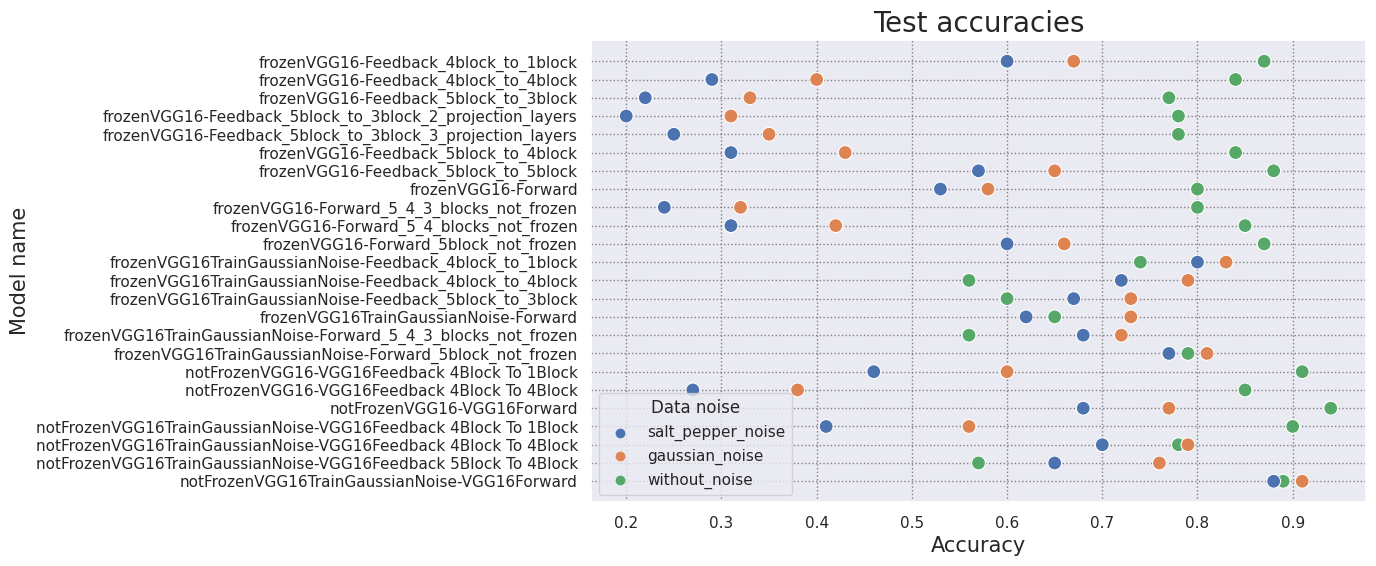

In [31]:
plot_accuracies(training_res)

In [32]:
not_frozen_ds = training_res.loc[training_res['Model name'].str.contains('notFrozen')]

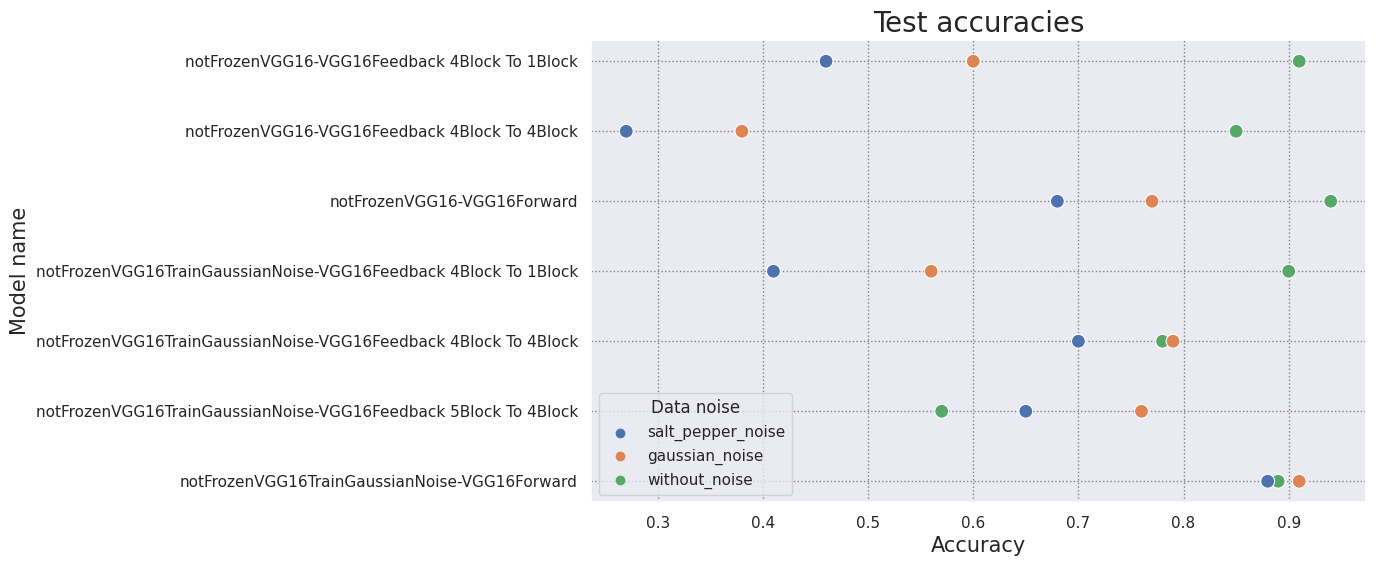

In [33]:
plot_accuracies(not_frozen_ds)

In [34]:
frozen_ds = training_res.loc[~training_res['Model name'].str.contains('notFrozen')]

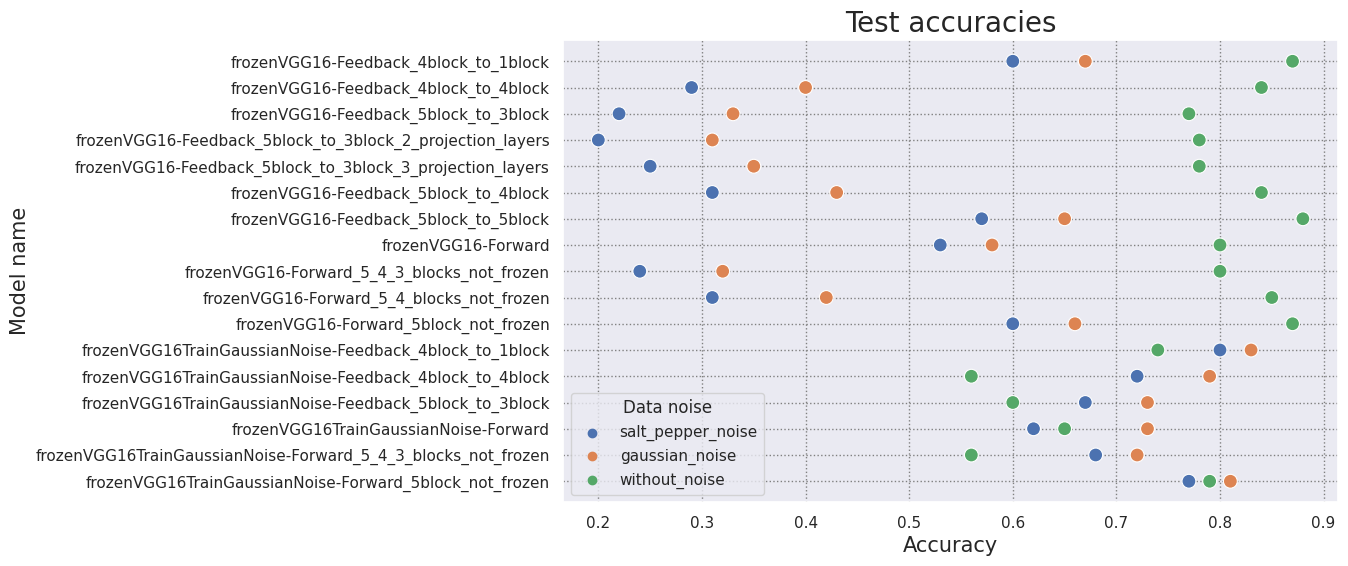

In [10]:
plot_accuracies(frozen_ds)

In [11]:
gaussian = training_res.loc[training_res['Model name'].str.contains('Gaussian')]

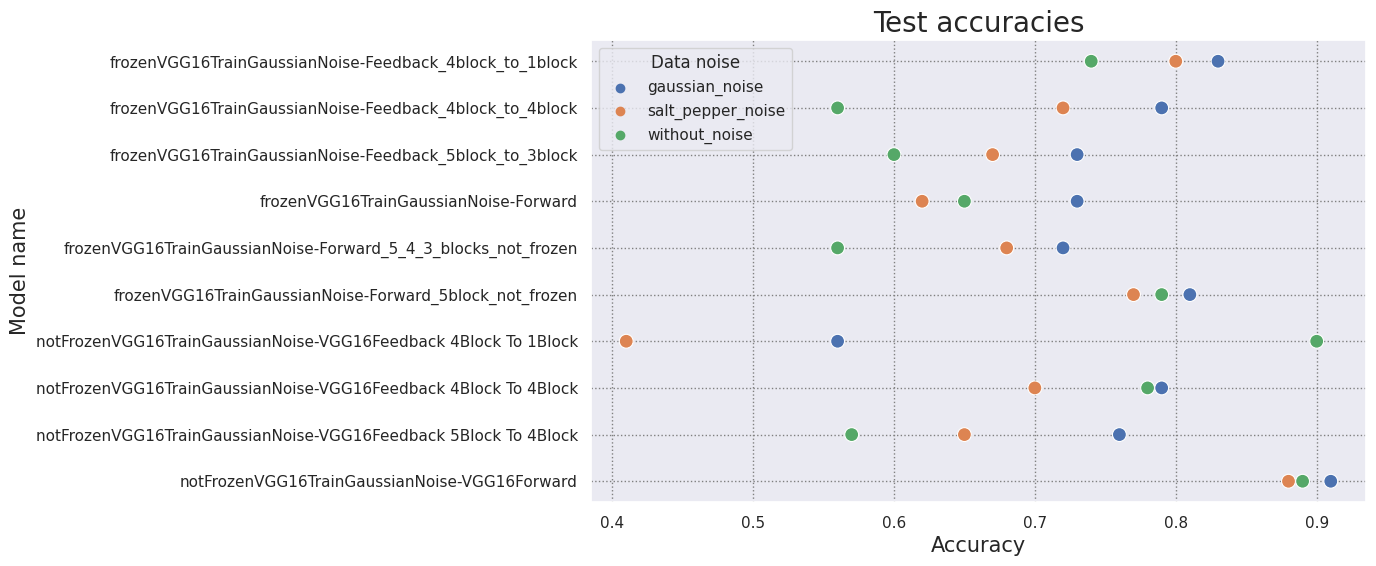

In [12]:
plot_accuracies(gaussian)

In [13]:
answer_research_question = training_res.loc[training_res['Model name'].str.contains('5block_not_frozen') | training_res['Model name'].str.contains('4block_to_1block')]

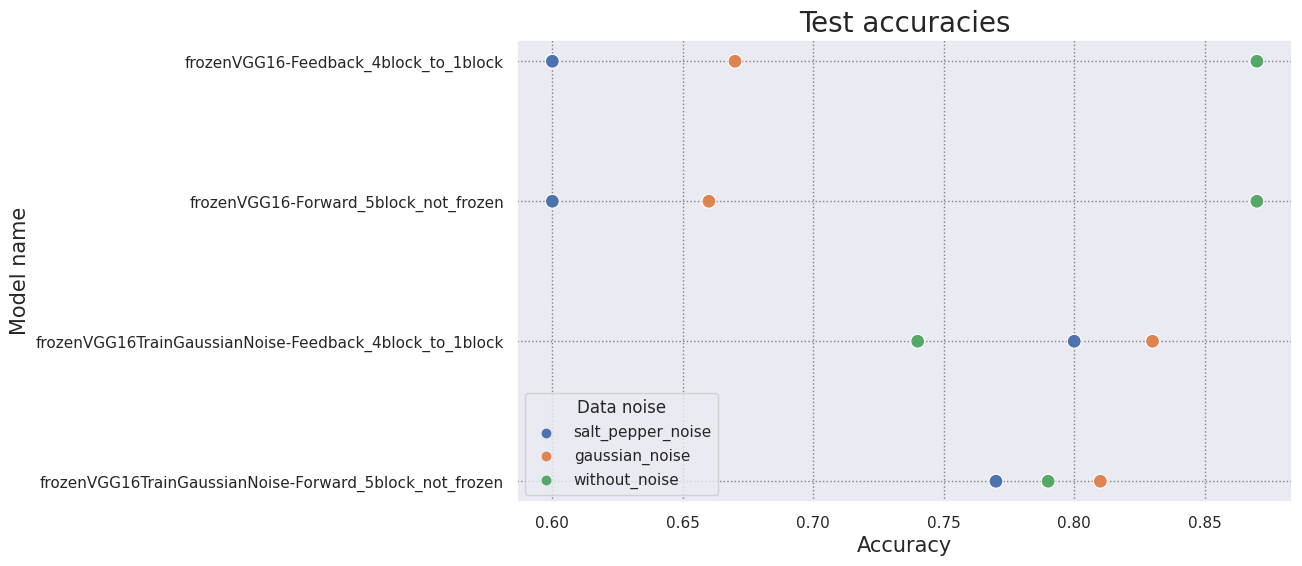

In [14]:
plot_accuracies(answer_research_question)

In [15]:
ds_5_3_block = training_res.loc[training_res['Model name'].str.contains('VGG16-Feedback_5block_to_3block')]

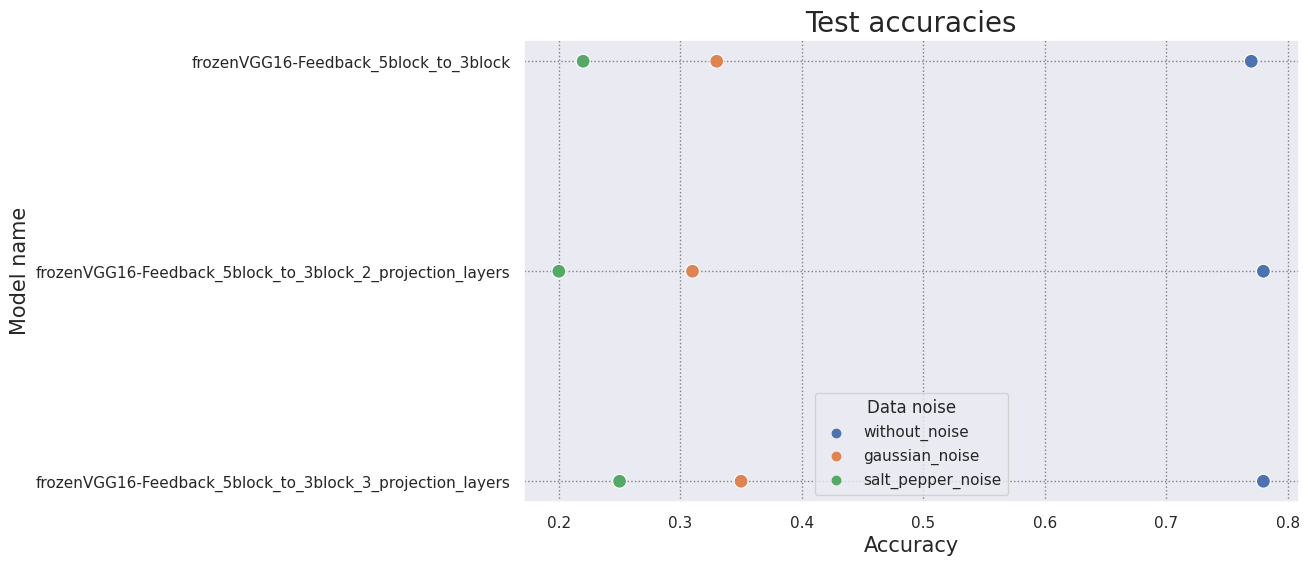

In [16]:
plot_accuracies(ds_5_3_block)

In [17]:
ds_5_3_block[ds_5_3_block["Data noise"] == "without_noise"]

,Model name,Accuracy,Data noise
3,frozenVGG16-Feedback_5block_to_3block,0.77,without_noise
12,frozenVGG16-Feedback_5block_to_3block_2_projec...,0.78,without_noise
0,frozenVGG16-Feedback_5block_to_3block_3_projec...,0.78,without_noise


In [18]:
def plot_bar_plot(df, title='Test accuracies'):
    sns.set(rc={
                "grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    palette ={"gaussian_noise": "C0", "without_noise": "C1", "salt_pepper_noise": "C2"}
    #unique = df["Model name"].unique()
    #palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
    sns.barplot(data=df, y="Accuracy", x="Model name", hue="Data noise", palette=palette)\
        .set(title=title)

# Frozen network

In [19]:
answer_research_question_prepared= answer_research_question.copy()
answer_research_question_prepared['Model name'] = answer_research_question_prepared['Model name']\
                                        .str.replace('frozenVGG16-Feedback_4block_to_1block',\
                                                     'Feedback')\
                                        .str.replace('frozenVGG16-Forward_5block_not_frozen',\
                                                     'Forward')\
                                        .str.replace('frozenVGG16TrainGaussianNoise-Forward_5block_not_frozen',\
                                                     'ForwardGaussian')\
                                        .str.replace('frozenVGG16TrainGaussianNoise-Feedback_4block_to_1block',\
                                                     'FeedbackGaussian')

In [20]:
answer_research_question1 = answer_research_question_prepared[~answer_research_question_prepared["Model name"].str.contains("Gaussian")]

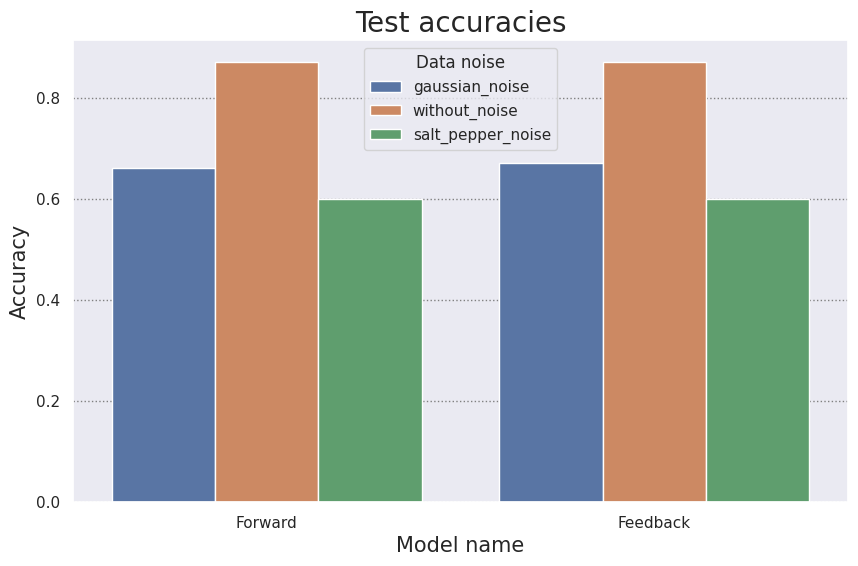

In [21]:
plot_bar_plot(answer_research_question1.sort_values(by="Model name", ascending=False))

In [22]:
answer_research_question2 = answer_research_question_prepared[answer_research_question_prepared["Model name"].str.contains("Forward")]

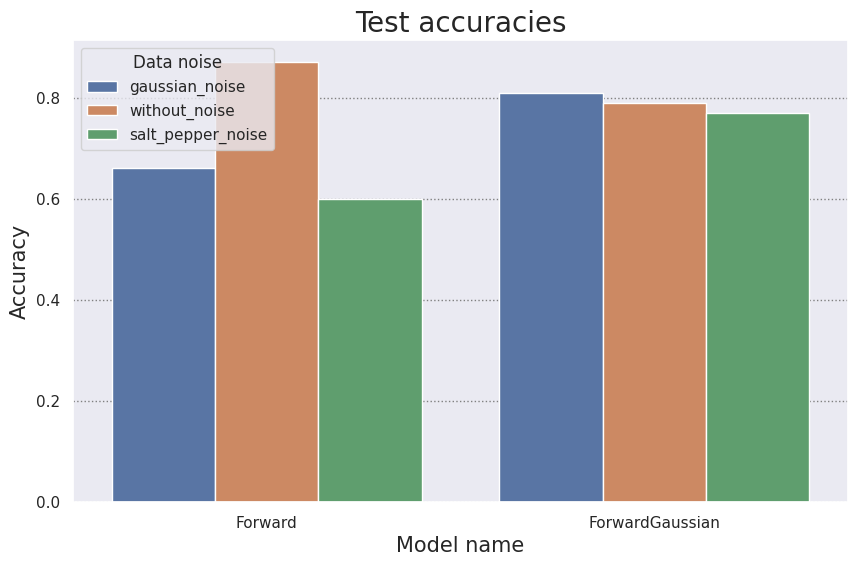

In [23]:
plot_bar_plot(answer_research_question2.sort_values(by="Model name", ascending=True))

In [24]:
answer_research_question3 = answer_research_question_prepared[answer_research_question_prepared["Model name"].str.contains("Gaussian")]

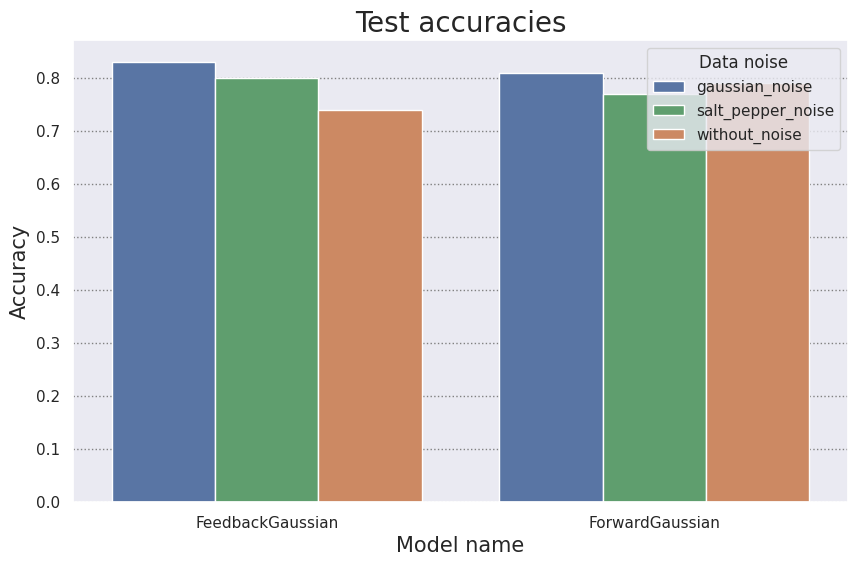

In [25]:
plot_bar_plot(answer_research_question3.sort_values(by="Model name", ascending=True))